In [1]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [2]:
# Importing the Dataset

df = pd.read_csv(r'clean.csv')
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,14.584667,0,0,0,10.133669,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,2.110477,0,0,0,12.756862,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,0.009966,0,0,0,9.753931,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,14.248198,0,0,0,12.386097,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,7.679823,0,0,0,12.069057,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35590,3,0,2,6,0,9.853082,0,0,0,15.623157,...,0,0,1,0,0,0,0,0,0,1
35591,2,0,1,3,0,14.685521,0,0,0,11.858268,...,0,0,0,0,0,0,0,0,0,1
35592,2,0,2,6,0,12.379835,0,0,0,12.294440,...,0,0,0,0,0,0,0,0,0,1
35593,2,0,0,3,0,8.664374,0,0,0,12.069057,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Seperating the Dependent and Independent variables

X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [4]:
# count the number of output categories

df['booking_status'].value_counts()

booking_status
1    23760
0    11835
Name: count, dtype: int64

In [5]:
# The ratio between Majority class and Minority class is greater than 2 whhich means the Dataset is Imbalanced
# As each class has greater than 1000 records we can go for UnderSampling to balance the data

from imblearn.under_sampling import RandomUnderSampler

rs = RandomUnderSampler(random_state=17)
x_new,y_new = rs.fit_resample(X,y)

In [6]:
# Splitting the data into Train and Test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,random_state=17,train_size=0.8)

In [7]:
# Building the Logistic Regression Model
# Evaluating the  Model on Train and Test data

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

ypred_train = lr.predict(x_train)

from sklearn.metrics import accuracy_score
print('Train Accuracy is :',accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print('cross validation score is :',cross_val_score(lr,x_train,y_train,cv=5,scoring='accuracy').mean())

ypred_test = lr.predict(x_test)
print('Test Accuracy is ;',accuracy_score(y_test,ypred_test))

Train Accuracy is : 0.7708069286016054
cross validation score is : 0.7729717264838388
Test Accuracy is ; 0.779467680608365


In [8]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[1882  514]
 [ 530 1808]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2396
           1       0.78      0.77      0.78      2338

    accuracy                           0.78      4734
   macro avg       0.78      0.78      0.78      4734
weighted avg       0.78      0.78      0.78      4734



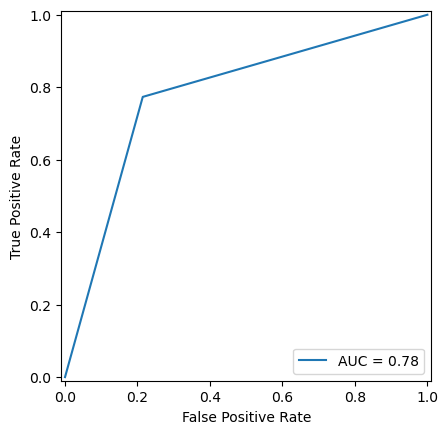

In [9]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
import matplotlib.pyplot as plt

fpr,tpr,threshold = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [10]:
from sklearn.metrics import roc_auc_score

print('AUC score is :',roc_auc_score(y_test,ypred_test))

AUC score is : 0.7793931574009147
